In [124]:
import control

In [125]:
import jupyter_dash
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

In [126]:
Gz = control.TransferFunction([1,0.4],[1, -1.2, 0.35], 2)
Gz

TransferFunction(array([1. , 0.4]), array([ 1.  , -1.2 ,  0.35]), 2)

In [127]:
control.feedback(Gz)

TransferFunction(array([1. , 0.4]), array([ 1.  , -0.2 ,  0.75]), 2)

In [128]:
T, yout = control.step_response(Gz)

In [129]:
list_of_tuples = list(zip(T, yout))

In [130]:
df = pd.DataFrame(list_of_tuples, columns = ['Tempo', 'Valor'])

In [131]:
df

,Tempo,Valor
0,0.0,0.000000
1,2.0,1.000000
2,4.0,2.600000
3,6.0,4.170000
4,8.0,5.494000
5,10.0,6.533300
6,12.0,7.317060
7,14.0,7.893817
8,16.0,8.311609
9,18.0,8.611095


In [132]:
fig = px.line(df, x = "Tempo", y='Valor')

In [133]:
fig

In [134]:
control.poles(Gz)

array([0.7+0.j, 0.5+0.j])

In [135]:
control.zeros(Gz)

array([-0.4+0.j])

In [136]:
import math

In [137]:
tetap1 = math.pi - math.atan((0.64/0.34))
tetap1

2.059130277851302

In [138]:
tetap2 = math.pi - math.atan((0.64/(0.5-0.36)))
tetap2

1.7861540264926346

In [139]:
tetaz1 = math.atan((0.64/(0.4+0.36)))
tetaz1

0.6998928697192437

In [140]:
tetap1 + tetap2 -tetaz1

3.1453914346246927

In [141]:
import numpy as np

In [142]:
x = np.arange(-2,2,0.1)

In [143]:
#%matplotlib widget

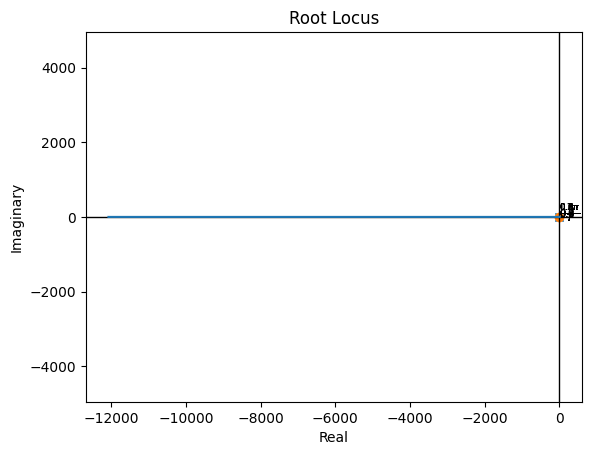

In [144]:
control.rlocus(Gz);

In [145]:
zcorte = -0.2124831 + 0.9771580j

In [146]:
abs(zcorte)

0.9999934123531065

In [147]:
zcorte.real

-0.2124831

In [148]:
rp0_7 = math.sqrt((zcorte.imag**2)+(0.7-zcorte.real)**2) 
rp0_7

1.3369604200385328

In [149]:
rp0_5 = math.sqrt((zcorte.imag**2)+(0.5-zcorte.real)**2) 
rp0_5

1.2093262275951886

In [150]:
rz0_4 = math.sqrt((zcorte.imag**2)+(0.4+zcorte.real)**2) 
rz0_4

0.9949876103498023

In [151]:
K = (rp0_5*rp0_7)/rz0_4
K

1.6249662652993846

In [152]:
T1, yout1 = control.step_response(control.feedback((K+0.1)*Gz), T = np.arange(0,1000,2))

In [153]:
import matplotlib.pyplot as plt

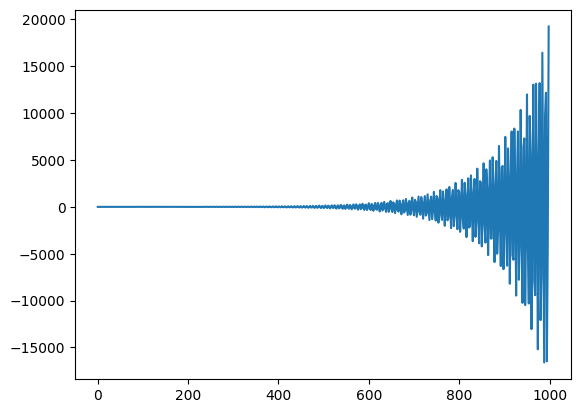

In [154]:
plt.plot(T1,yout1)

In [155]:
import matplotlib.pyplot as plt

In [156]:
list_of_tuples1 = list(zip(T1, yout1))

In [157]:
df1 = pd.DataFrame(list_of_tuples1, columns = ['Tempo', 'Valor'])

In [158]:
fig = px.line(df1, x = "Tempo", y='Valor')

In [159]:
Gz

TransferFunction(array([1. , 0.4]), array([ 1.  , -1.2 ,  0.35]), 2)

In [160]:
fig

In [161]:
yout2, T2 = control.step_response(Gz)

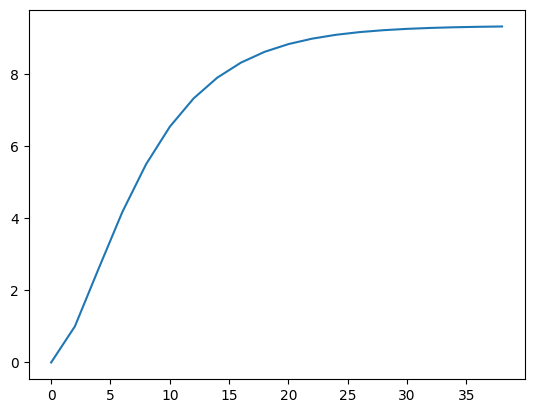

In [162]:
plt.plot(yout2, T2)

Exercicio 2

In [163]:
Gs = control.TransferFunction([1], [2,1])
Gs

TransferFunction(array([1]), array([2, 1]))

In [164]:
Ts = 0.1
Gz = control.sample_system(Gs, Ts, 'zoh')
Gz

TransferFunction(array([0.04877058]), array([ 1.        , -0.95122942]), 0.1)

In [165]:
import harold

In [166]:
Gs1 = harold.Transfer([1], [2,1])
Gs1

Continuous-Time Transfer function
 1 input and 1 output

  Poles(real)    Poles(imag)  Zeros(real)    Zeros(imag)
-------------  -------------  -------------  -------------
         -0.5              0


In [167]:
Gz1 = harold.discretize(Gs1, Ts, method = 'zoh')

In [168]:
Gw1 = harold.undiscretize(Gz1, method = 'tustin')
Gw1.num[0][:]

array([-0.02499479,  0.49989586])

In [169]:
Gw = control.TransferFunction(Gw1.num[0], Gw1.den[0])
Gw

TransferFunction(array([-0.02499479,  0.49989586]), array([1.        , 0.49989586]))

In [170]:
youtS, TS = control.step_response(Gs)

In [171]:
youtZ, TZ = control.step_response(Gz)

In [172]:
youtW, TW = control.step_response(Gw)

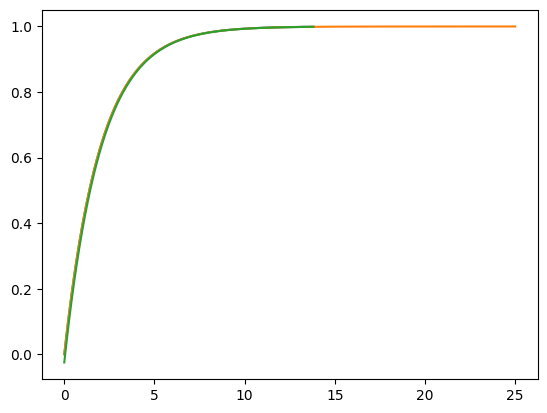

In [173]:
plt.plot(youtS, TS)
plt.plot(youtZ, TZ)
plt.plot(youtW, TW)

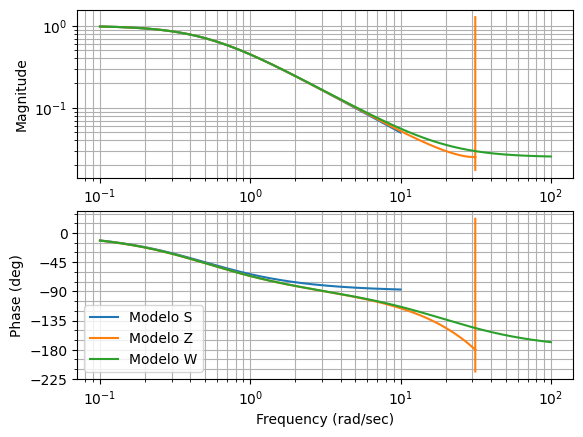

In [174]:
control.bode_plot(Gs, label = "Modelo S");
control.bode_plot(Gz, label = "Modelo Z");
control.bode_plot(Gw, label = "Modelo W");
plt.legend()

In [175]:
gm, pm, wcg, wcp = control.margin(Gw)
print('Margem de ganho: ', gm)
print('Margem de fase: ', str(pm) + ' graus')
print('Frequência associada com a margem de ganho: ', str(wcg) + ' Rad/seg')
print('Frequência associada com a margem de fase: ', str(wcp) + ' Rad/seg')

Margem de ganho:  inf
Margem de fase:  inf graus
Frequência associada com a margem de ganho:  nan Rad/seg
Frequência associada com a margem de fase:  nan Rad/seg


In [176]:
ww = 2/Ts * math.tan((10*Ts)/2)
ww

10.926049796875809

In [177]:
magJW, phase, omega = control.bode(Gw, dB =False,omega = ww, plot=False)

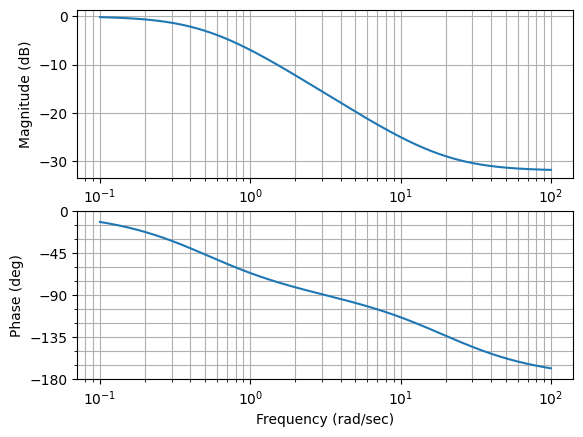

In [178]:
control.bode(Gw, dB =True);

In [179]:
phase * (180 / 3.14159265)

array([-116.02828234])

In [180]:
magJW

array([0.0520804])

In [181]:
ww

10.926049796875809

In [182]:
from math import pi

In [183]:
phi = -180 + 45 - (phase[0] * (180 / 3.14159265))
phi

-18.97171766320092

In [184]:
Kp = math.cos(phi * (math.pi)/180) / (magJW[0])
Kp

18.158063203608588

In [185]:
Ki = - ww * (math.sin(phi * (math.pi)/180)/(magJW[0]))
Ki

68.20366314639502

In [186]:
P = control.TransferFunction([Kp], 1)
P

TransferFunction(array([18.1580632]), array([1]))

In [187]:
I  = control.TransferFunction(Ki, [1, 0])
I

TransferFunction(array([68.20366315]), array([1, 0]))

In [188]:
PI = P + I
PI

TransferFunction(array([18.1580632 , 68.20366315]), array([1, 0]))

In [189]:
y, T = control.step_response(control.feedback(control.series(Gw, PI)))

Text(0.5, 1.0, 'Resposta do sistema controlado')

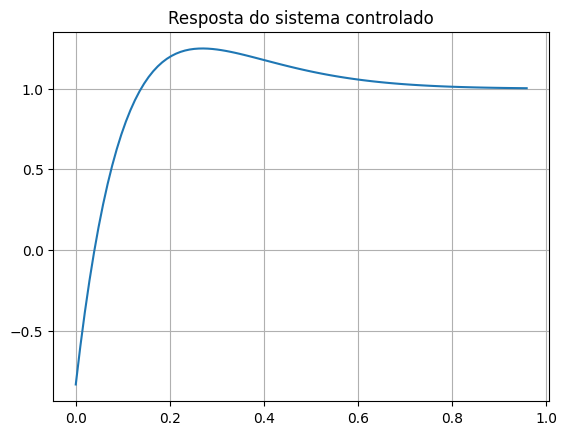

In [194]:
plt.plot(y,T)
plt.grid()
plt.title("Resposta do sistema controlado")

In [228]:
Temp = np.arange(0, 15, 0.001)

In [221]:
Gs

TransferFunction(array([1]), array([2, 1]))

In [229]:
yout2, T2 = control.step_response(control.feedback(Gs), T = Temp)

In [230]:
y, T = control.step_response(control.feedback(control.series(Gw, PI)), T = Temp)

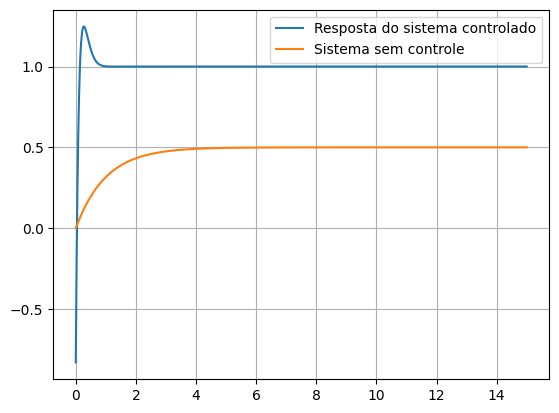

In [231]:
plt.plot(y,T, label = "Resposta do sistema controlado")
plt.plot(yout2, T2, label = 'Sistema sem controle')
plt.legend()
plt.grid()

In [191]:
plt.clf()

<Figure size 640x480 with 0 Axes>

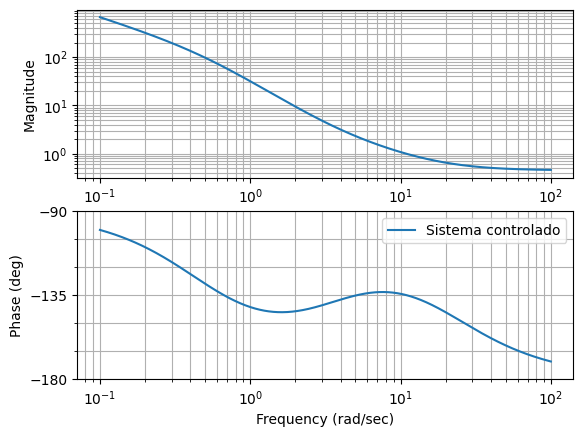

In [192]:
control.bode(control.series(Gw, PI), label = 'Sistema controlado');
plt.legend()
plt.show()

In [193]:
gm, pm, wcg, wcp = control.margin(control.series(Gw, PI))
print('Margem de ganho: ', gm)
print('Margem de fase: ', str(pm) + ' graus')
print('Frequência associada com a margem de ganho: ', str(wcg) + ' Rad/seg')
print('Frequência associada com a margem de fase: ', str(wcp) + ' Rad/seg')

Margem de ganho:  inf
Margem de fase:  45.00000013258162 graus
Frequência associada com a margem de ganho:  nan Rad/seg
Frequência associada com a margem de fase:  10.926049796875812 Rad/seg


In [232]:
PIz = control.sample_system(PI, Ts)
PIz

TransferFunction(array([ 18.1580632 , -11.33769689]), array([ 1., -1.]), 0.1)

In [233]:
Gz

TransferFunction(array([0.04877058]), array([ 1.        , -0.95122942]), 0.1)

In [234]:
y2, T = control.step_response(control.feedback(control.series(Gz, PIz)))

In [241]:
y, T2 = control.step_response(control.feedback(control.series(Gw, PI)), T = np.arange(0, 5, 0.001))

Text(0.5, 1.0, 'Resposta do sistema controlado e discretizado')

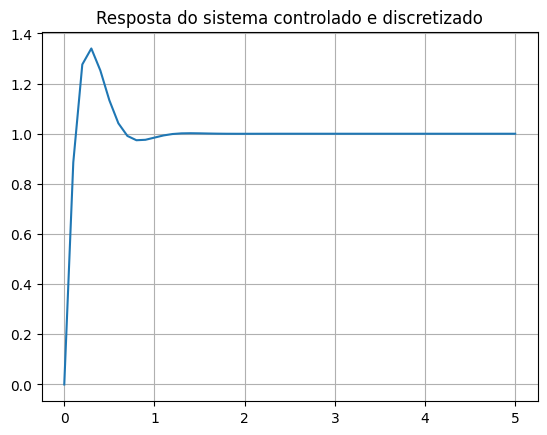

In [236]:
plt.plot(y2, T)
plt.grid()
plt.title("Resposta do sistema controlado e discretizado")

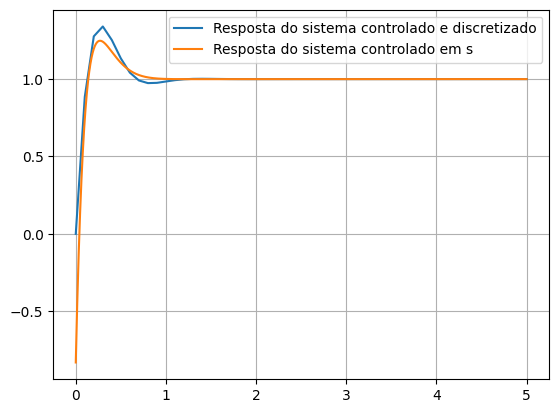

In [244]:
plt.plot(y2, T, label = "Resposta do sistema controlado e discretizado")
plt.plot(y,T2, label = "Resposta do sistema controlado em s")
plt.grid()
plt.legend()